# SanUnit and System

* **Prepared by:**
    
    - Yalin Li

* **Covered topics:**

    - `SanUnit`
    - `System`

* **Update date:** 2021-04-27
* `qsdsan` **version:** 0.2.4

In [1]:
# To change directory to the cloned qsdsan (as opposed to the pip installed version)
# import os
# path = os.path.realpath('')+'/../../../'
# os.chdir(path)

In [2]:
import biosteam as bst
import qsdsan as qs
from qsdsan import sanunits as su

## Creating and using `SanUnit`
`SanUnit` can be used in the same way that `Unit` is used in `biosteam`, but `SanUnit` interacts with `WasteStream` objects rather than `Stream`.

In [3]:
# First we need to set the thermo object, and we will just import one for demonstration.
# Topics about Component and WasteStream are covered in another tutorial
from exposan import bwaise as bw
cmps = bw.cmps
bst.settings.set_thermo(cmps)
ins1 = qs.WasteStream('ins1', H2O=1000, NH3=10, P=1)
ins2 = ins1.copy()
ins3 = ins2.copy()
ins3.T = 320
ins3.show()

WasteStream: ws15
 phase: 'l', T: 320 K, P: 1 Pa
 flow (g/hr): NH3  1e+04
              H2O  1e+06
 WasteStream-specific properties:
  pH         : 7.0
  Alkalinity : 2.5 mg/L
  TN         : 9705.7 mg/L
  TKN        : 9705.7 mg/L



### Inherited units from `biosteam`
``qsdsasn`` has integrated commonly ``biosteam`` units such as ``Mixer``, ``Splitter``, etc., and you can create and simulate them in the same way as you use them in ``biosteam``.

Mixer: M1
ins...
[0] ins1
    phase: 'l', T: 298.15 K, P: 1 Pa
    flow (g/hr): NH3  1e+04
                 H2O  1e+06

    WasteStream-specific properties:
     pH         : 7.0
     TN         : 9808.1 mg/L
     TKN        : 9808.1 mg/L
[1] ws14
    phase: 'l', T: 298.15 K, P: 1 Pa
    flow (g/hr): NH3  1e+04
                 H2O  1e+06

    WasteStream-specific properties:
     pH         : 7.0
     TN         : 9808.1 mg/L
     TKN        : 9808.1 mg/L
[2] ws15
    phase: 'l', T: 320 K, P: 1 Pa
    flow (g/hr): NH3  1e+04
                 H2O  1e+06

    WasteStream-specific properties:
     pH         : 7.0
     TN         : 9705.7 mg/L
     TKN        : 9705.7 mg/L
outs...
[0] mixture
    phase: 'l', T: 305.43 K, P: 101325 Pa
    flow (g/hr): NH3  3e+04
                 H2O  3e+06

    WasteStream-specific properties:
     pH         : 7.0
     TN         : 9775.9 mg/L
     TKN        : 9775.9 mg/L


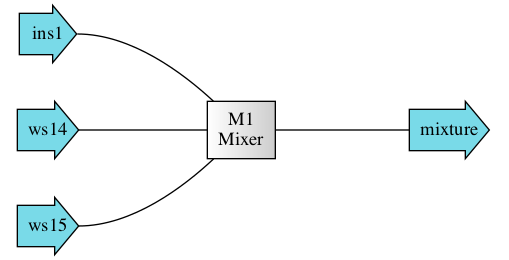

In [4]:
M1 = su.Mixer('M1', ins=(ins1, ins2, ins3), outs='mixture')
M1.simulate()
M1.show()
M1.diagram()

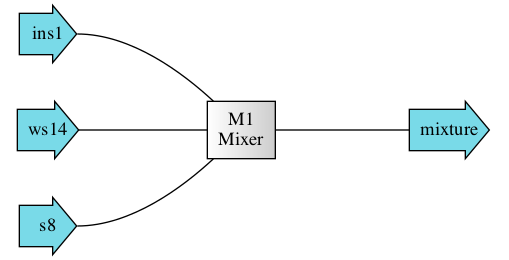

Mixer: M1
ins...
[0] ins1
    phase: 'l', T: 298.15 K, P: 1 Pa
    flow (g/hr): NH3  1e+04
                 H2O  1e+06

    WasteStream-specific properties:
     pH         : 7.0
     TN         : 9808.1 mg/L
     TKN        : 9808.1 mg/L
[1] ws14
    phase: 'l', T: 298.15 K, P: 1 Pa
    flow (g/hr): NH3  1e+04
                 H2O  1e+06

    WasteStream-specific properties:
     pH         : 7.0
     TN         : 9808.1 mg/L
     TKN        : 9808.1 mg/L
[2] s8  from  MixTank-M2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0
outs...
[0] mixture  from  Splitter-S1
    phase: 'l', T: 305.43 K, P: 101325 Pa
    flow (g/hr): NH3  3e+04
                 H2O  3e+06

    WasteStream-specific properties:
     pH         : 7.0
     TN         : 9775.9 mg/L
     TKN        : 9775.9 mg/L


In [5]:
S1 = su.Splitter('S1', ins=M1-0, outs=('', ''), split=0.2)
ins4 = qs.WasteStream('ins4', Mg=7, H2O=1000, units='kg/hr')
P1 = su.Pump('P1', ins=ins4)
M2 = su.MixTank('M2', ins=(S1-0, P1-0), tau=2)
M2-0-2-M1

### New units in `qsdsan`
Additionally, `qsdsan` comes with many sanitation and wastewater-related unit operations, for example, the unit `Excretion` estimates energy and nutrient resources in a person's exreta based on the diet. Details on these units are provided in their respective documents.

In [6]:
E1 = su.Excretion('E1', outs=('E1_urine', 'E1_feces'))
E1.simulate()
E1.show()

Excretion: E1
ins...
outs...
[0] E1_urine
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): NH3      0.213
                 NonNH3   0.0377
                 P        0.026
                 K        0.0694
                 Mg       0.00833
                 Ca       0.0117
                 H2O      55.4
                 OtherSS  2.55

    WasteStream-specific properties:
     pH         : 7.0
     COD        : 5146.0 mg/L
     TN         : 4273.6 mg/L
     TKN        : 4273.6 mg/L
     TP         : 442.4 mg/L
     TK         : 1180.3 mg/L
[1] E1_feces
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): NH3      0.00685
                 NonNH3   0.0274
                 P        0.0166
                 K        0.0244
                 Mg       0.0104
                 Ca       0.0792
                 H2O      8.85
                 OtherSS  1.4

    WasteStream-specific properties:
     pH         : 7.0
     COD        : 120065.3 mg/L
     TN         : 3189.4 mg/L
     TKN   

## Making a simple `System`
You can also make `System` objects with `SanUnit`.

System: System
Highest convergence error among components in recycle
stream M2-0 after 3 loops:
- flow rate   0.00e+00 kmol/hr (0%)
- temperature 1.59e-11 K (5.3e-12%)
ins...
[0] ins1
    phase: 'l', T: 298.15 K, P: 1 Pa
    flow (kmol/hr): NH3  0.587
                    H2O  55.5
[1] ws14
    phase: 'l', T: 298.15 K, P: 1 Pa
    flow (kmol/hr): NH3  0.587
                    H2O  55.5
[2] ins4
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Mg   0.288
                    H2O  55.5
outs...
[0] s6
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): NH3  1.17
                    Mg   0.288
                    H2O  167
[1] s8
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): NH3  0.294
                    Mg   0.36
                    H2O  97.1


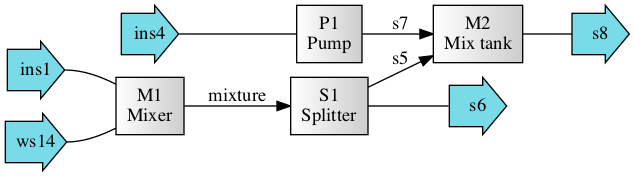

In [7]:
System = bst.System('System', path=(M1, S1, P1, M2), recycle=M2-0)
System.simulate()
System.show()
System.diagram()

In [8]:
M2.show()
M2.results()

MixTank: M2
ins...
[0] s5  from  Splitter-S1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): NH3  5e+03
                 Mg   1.75e+03
                 H2O  7.5e+05
[1] s7  from  Pump-P1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): Mg   7e+03
                 H2O  1e+06
outs...
[0] s8
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): NH3  5e+03
                 Mg   8.75e+03
                 H2O  1.75e+06


Mix tank                              Units       M2
Power               Rate                 kW    0.436
                    Cost             USD/hr   0.0742
Design              Residence time       hr        2
                    Total volume        m^3     4.43
                    Number of tanks                1
Purchase cost       Tanks               USD 2.85e+04
Total purchase cost                     USD 2.85e+04
Utility cost                         USD/hr   0.0742